<a href="https://colab.research.google.com/github/OlhaZahrebelna/python_for_ds_task/blob/main/ZahrebelnaOlha_%D0%9B%D1%96%D0%BD%D0%B8%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачі


Компанія ACME Insurance Inc. пропонує доступне медичне страхування тисячам клієнтів по всіх Сполучених Штатах. Як головний дата-сайентіст в ACME, **вам доручено створити автоматизовану систему для оцінки річних медичних витрат для нових клієнтів**, використовуючи інформацію, таку як їх вік, стать, ІМТ, діти, звички щодо куріння та регіон проживання.


Оцінки з вашої системи будуть використовуватися для визначення річної страхової премії (сума, що сплачується щомісяця) пропонованої клієнту. Через регулятивні вимоги, ви повинні мати змогу пояснити, чому ваша система видає певний прогноз.


Вам надано [CSV файл](https://drive.google.com/file/d/13UBFUbkaqccMc4WFHs60tzndCyTOWGE_/view?usp=sharing), що містить перевірені історичні дані, які складаються з вищезгаданої інформації та фактичних медичних витрат, здійснених понад 1300 клієнтами.
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Джерело набору даних: https://github.com/stedy/Machine-Learning-with-R-datasets



## **Завдання 1**:
Перед тим як продовжувати, зупиніться на мить і подумайте, як ви можете підійти до цієї проблеми. Запишіть п'ять або більше ідей, які приходять вам на думку нижче:

1. Базова перевірка даних (null, outliers, дублікати тут не можемо перевірити, бо немаємо id)
2. Перевірити гіпотезу чи з підвищенням BMI зростають медичні витрати?
3. Перевірити гіпотезу чи зі збільшенням віку зростають витрати?
4. Проаналізувати данні по когортам Sex, Region?
5. Перевірити чи наявність та кількість дітей впливають на витрати?
6. Перевірити чи є лінійний звязок між тим чи палить людина?
7. Перевірити взаємодіі між тим що людина курить та підвищенням bmi.

## Завантаження даних

Для початку, давайте завантажимо дані з файлу csv.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_name = '/content/drive/MyDrive/Colab Notebooks/date/medical-charges.csv'

In [ ]:
medical_df = pd.read_csv(file_name)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Набір даних містить 1338 рядків та 7 стовпців. Кожен рядок набору даних містить інформацію про одного клієнта.

Наша мета - знайти спосіб оцінки значення в стовпці "charges", використовуючи значення в інших стовпцях. Якщо ми можемо це зробити для історичних даних, то ми повинні змогти оцінити вартість для нових клієнтів, просто запитавши інформацію, таку як їх вік, стать, ІМТ, кількість дітей, звички щодо куріння та регіон.

Давайте перевіримо тип даних для кожного стовпця.

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Схоже, що "вік", "діти", "ІМТ" ([індекс маси тіла](https://en.wikipedia.org/wiki/Body_mass_index)) та "платежі" є числами, тоді як "стать", "курець" та "регіон" є рядками (можливо, категоріями). Жоден з стовпців не містить пропущених значень, що економить нам чимало часу!

Про те, як можна заповнювати пропущені дані і чому це варто робити - розповідаю на великому курсі, а для тих, хто хоче розібратись прямо зараз рекомендую [статтю](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) .

Глянемо статистику для числових стовпців:

In [ ]:
medical_df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


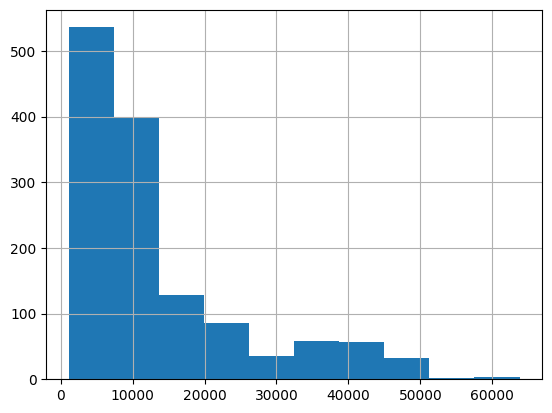

In [ ]:
medical_df.charges.hist();

Діапазони значень в числових стовпцях також здаються розумними (немає від'ємного віку!), тому нам може не довестися робити багато очищення даних або корекції. Однак стовпець "charges" здається значно спотвореним, оскільки медіана (50 перцентиль) набагато нижча за максимальне значення.

> **Висновки**:
>
> 1. intro: У наборі 1338 рядків і 7 стовпців. Пропущених значень немає в жодному стовпці – це спрощує підготовку даних. Числові змінні: age, bmi, children, charges (типи int64/float64). Категоріальні змінні: sex, smoker, region (тип object).
> 2. describe: Для age і children явних аномалій майже немає. Для bmi можуть бути екстремальні значення. Для charges та children росподіл виглядає скошеним в право.
> 3. Значення виглядають реалістичними, негативних чи абсурдних немає.
Найсерйозніше, що кидається в очі, – велика варіативність і права асиметрія саме у charges, плюс можливі викиди в bmi.


## Дослідницький аналіз та візуалізація з plotly

Давайте дослідимо дані, візуалізуючи розподіл значень у деяких стовпцях набору даних, а також взаємозв'язки між "витратами" та іншими стовпцями.

В машинному навчанні найчастіше використовують бібліотеки Matplotlib, Seaborn та Plotly для візуалізації. І ми теж будемо працювати з ними. Аби отримати інтро про те, як ними користуватись - рекомендую наступні ресурси Ознайомтеся з цими посібниками, щоб дізнатися, як використовувати ці бібліотеки:

- https://matplotlib.org/stable/users/explain/quick_start.html
- https://plotly.com/python/getting-started/

Але навіть якщо ви ніколи не користувались цими існтрументами - це не біда. Просто робіть за мною за аналогією і ви вже будете будувати найнеобхіжніші графіки. А в роботі можете просто потім скопіювати код звідси 😉

Спочатку імпортуємо всі лібки. Зазвичай ми їх імпортуємо саме в такий спосіб, це зручно для подальшого використання.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


Наступні налаштування допоможуть покращити стандартний стиль та розміри шрифтів для наших діаграм. Налаштування за замовченням - теж норм. Справа смаку.

In [ ]:
# палітра для куріння
SMOKER_COLORS = {
    'yes': '#E4572E',   # червонуватий – курить
    'no':  '#4E79A7',   # синій – не курить
}

# палітра для статі
SEX_COLORS = {
    'female': '#4C78A8',  # синій
    'male':   '#F58518',  # помаранчевий
}

# палітра для регіонів
REGION_COLORS = {
    'southwest': '#59A14F',
    'southeast': '#EDC948',
    'northwest': '#B07AA1',
    'northeast': '#FF9DA7',
}

# палітра для кількості дітей (0–5)
CHILDREN_COLORS = {
    0: '#9E9E9E',
    1: '#4C78A8',
    2: '#F58518',
    3: '#54A24B',
    4: '#E4572E',
    5: '#B07AA1',
}


In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Вік

Вік - це числова колонка. Мінімальний вік в наборі даних - 18 років, а максимальний - 64 роки. Таким чином, ми можемо візуалізувати розподіл віку, використовуючи гістограму з 47 бінами (один на кожен рік) та ящик з вусами. Ми використаємо plotly для створення інтерактивної діаграми, але ви можете створити подібні діаграми, використовуючи Seaborn.

Про те, які бувають графіки і коли який використовувати можна ознайомитись тут:

  https://datavizcatalogue.com/

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

Розподіл віку в наборі даних майже рівномірний, з 20-30 клієнтами на кожен вік, за винятком 18 та 19 років, де здається, що клієнтів більше ніж у два рази порівняно з іншими віками. Рівномірний розподіл може виникнути через те, що немає великої варіації в [кількості людей певного віку](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (між 18 та 64 роками) в США.

Чи можете ви пояснити, чому клієнтів віком 18 та 19 років більше ніж у два рази порівняно з іншими віками?

Можливо це страхування від школи чи колледжу. Або вибірка сформована вибірково.


### Індекс маси тіла

Давайте подивимося на розподіл ІМТ (Індексу маси тіла) клієнтів, використовуючи гістограму та ящик з вусами.

In [ ]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


Вимірювання індексу маси тіла, здається, формують [гаусівський розподіл](https://en.wikipedia.org/wiki/Normal_distribution), центрований навколо значення 30, з кількома викидами вправо.

# Про Гаусівський розподіл
Гауссівський розподіл, також відомий як нормальний розподіл, є одним з найважливіших та найчастіше використовуваних розподілів у статистиці. Він має характерну форму дзвону та описує, як розподілені дані навколо середнього значення.

Ключові аспекти про гауссівський розподіл, які усім потрібно знати:

1. **Параметри - середнє значення та стандартне відхилення**: Гауссівський розподіл описується двома параметрами — середнім значенням (μ) та стандартним відхиленням (σ). Середнє значення показує, де на осі значень зосереджені дані, а стандартне відхилення вказує на те, наскільки далеко в середньому дані розподілені від середнього значення.

2. **Симетрія**: Крива нормального розподілу симетрична відносно свого середнього значення. Це означає, що однакова частка даних розташовується з кожного боку від середнього значення.

3. **Розподіл відхилень**: Приблизно 68% усіх значень знаходяться в межах одного стандартного відхилення від середнього, близько 95% — в межах двох стандартних відхилень, а 99.7% — в межах трьох стандартних відхилень. Це відомо як правило 68-95-99.7 або правило трьох сигм.

4. **Широка розповсюдженість**: Нормальний розподіл часто зустрічається в природі та соціальних науках, оскільки багато процесів та характеристик, вивчені в цих сферах, мають тенденцію до нормалізації через вплив багатьох маленьких, незалежних чинників. Наприклад, це можуть бути такі характеристики, як зріст людей, артеріальний тиск, результати тестів тощо.

## Як перевірити, що дані розподілені за Гаусом

Один з поширених способів перевірити, чи дотримується розподіл даних гауссового розподілу - це використання статистичних тестів, найчастіше викорситовують тест Шапіро-Вілка або тест Д'Агостино К^2. Ці тести оцінюють, чи дані мають характеристики нормального розподілу.

- [**Тест Шапіро-Вілка**](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) - ефективний для невеликих вибірок (зазвичай менше 2000 спостережень) і часто використовується для перевірки наявності нормальності.

- [**Тест Д'Агостино К^2**](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test) - базується на куртозисі та асиметрії ваших даних для перевірки нормальності. Він краще підходить для великих вибірок.

Протестуємо дані BMI на гаусовість:


In [ ]:
from scipy.stats import shapiro, normaltest

In [ ]:
? normaltest

In [ ]:
data = medical_df['bmi']

# Тест Шапіро-Вілка
stat, p_value_shapiro = shapiro(data)
print("Тест Шапіро-Вілка:")
print("Статистика тесту:", stat)
print("P-значення:", p_value_shapiro)

# Тест Д'Агостино К^2
stat, p_value_agostino = normaltest(data)
print("\nТест Д'Агостино К^2:")
print("Статистика тесту:", stat)
print("P-значення:", p_value_agostino)

# Інтерпретація результатів
if p_value_shapiro > 0.05:
    print("\nЗа результатами тесту Шапіро-Вілка дані мають нормальний розподіл (не відхиляємо H0).")
else:
    print("\nЗа результатами тесту Шапіро-Вілка дані не мають нормального розподілу (відхиляємо H0).")

if p_value_agostino > 0.05:
    print("За результатами тесту Д'Агостино К^2 дані мають нормальний розподіл (не відхиляємо H0).")
else:
    print("За результатами тесту Д'Агостино К^2 дані не мають нормального розподілу (відхиляємо H0).")


Тест Шапіро-Вілка:
Статистика тесту: 0.9938864621676107
P-значення: 2.60468368798344e-05

Тест Д'Агостино К^2:
Статистика тесту: 17.581447872784118
P-значення: 0.0001521377897266011

За результатами тесту Шапіро-Вілка дані не мають нормального розподілу (відхиляємо H0).
За результатами тесту Д'Агостино К^2 дані не мають нормального розподілу (відхиляємо H0).


Іноді може бути корисним протестувати на Гаусовість візуально. Для цього існує метод побудови QQ-графіка (Quantile-Quantile Plot).

# QQ-Plot

QQ-Plot (або квантиль-квантиль графік) взагалі має більш загальне значення — це графічний метод для визначення того, чи відповідає набір даних певному розподілу ймовірностей, чи дві вибірки даних надійшли з однієї сукупності чи ні.

Що собою являє цей графік:
- Це графік квантилів першого набору даних проти **квантилів** другого набору даних.

- Для довідкових цілей також наносять на графік лінію 45%; і якщо вибірки з однієї сукупності, то точки розташовані вздовж цієї лінії.

## Що таке "квантиль"
Не плутати з "квартилем"!

**Квантилі** — це точки в наборі даних, які ділять дані на інтервали, що містять рівні частки загального розподілу (рівну кількість даних на кожен "бін"). Це загальний термін для будь-якого показника, що ділить дані на частини.

Наприклад, **персентиль** є типом квантилю, який ділить розподіл на 100 рівних частин. 25-й персентиль (або перший квартиль) показує, що 25% даних знаходяться нижче цього значення. 50-й персентиль (медіана) ділить дані на дві рівні частини.

**Квартилі** ділять дані на чотири частини, а **децилі** — на десять, де кожен дециль відображає кожні 10% даних.

В цьому методі використовуються саме квантилі і це зручно, адже ми можемо розбити дані на будь-яку кількість частин до кількості точок в даних включно.


## Як намалювати QQ-графік?
Щоб намалювати квантиль-квантильний (QQ) графік на зібраних даних робимо наступні кроки:

1. **Сортування даних**: Впорядковуємо дані за зростанням або спаданням. Цей крок є важливим для точного обчислення квантилів.
2. **Вибір теоретичного розподілу**: Визначаємо теоретичний розподіл, з яким ми хочемо порівняти свій набір даних. Популярні вибори включають нормальний розподіл, експоненціальний розподіл або будь-який інший розподіл, який добре підходить до наших даних.
3. **Обчислення теоретичних квантилів**: Обчислюємо квантилі для обраного теоретичного розподілу. Наприклад, якщо ви порівнюєте з нормальним розподілом, ви б використали зворотну функцію кумулятивного розподілу (CDF) нормального розподілу для визначення очікуваних квантилів.
  - [Про генерацію даних і чому нам треба обернений кумулятивний розподіл в Python](https://towardsdatascience.com/generate-random-variable-using-inverse-transform-method-in-python-8e5392f170a3)
  - для генерації inverse normal CDF використовується метод `ppf(q, loc=0, scale=1)` з [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

4. **Побудова графіка**:
   - Наносимо значення впорядкованого набору даних на вісь x.
   - Наносимо відповідні теоретичні квантилі на вісь y.
   - Кожна точка даних (x, y) представляє пару спостережуваних та очікуваних теоретичних значень.
   - З'єднуємо точки даних, щоб візуально оцінити відносини між набором даних та теоретичним розподілом.


Детальніше про побудову QQ-графіка у цьому [відео](https://youtu.be/okjYjClSjOg?si=N9ISPMnRjbBljtYC).

**Інтерпретація QQ-графіка**
- Якщо точки на графіку приблизно лежать на прямій лінії, це вказує на те, що ваш набір даних відповідає припущеному розподілу.

- Відхилення від прямої лінії вказують на невідповідності з припущеним розподілом, що вимагає подальшого дослідження.

Побудуємо графік для наших даних:

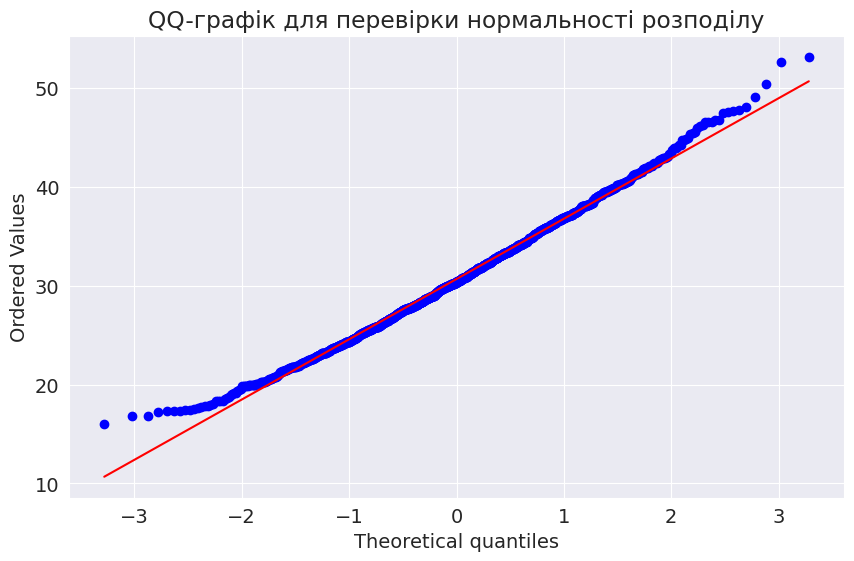

In [ ]:
from scipy import stats

stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ-графік для перевірки нормальності розподілу")
plt.show()

## Типи QQ-графіків
Існує кілька типів QQ-графіків, які часто використовуються у статистиці та аналізі даних, кожен з яких підходить для різних сценаріїв чи цілей:

1. **Нормальний розподіл**: Симетричний розподіл, де на QQ-графіку точки приблизно укладаються вздовж діагональної лінії, якщо дані відповідають нормальному розподілу.
2. **Правоскошений розподіл**: Розподіл, на QQ-графіку якого спостерігається візерунок, де спостережувані квантилі відхиляються від прямої лінії вгору, що вказує на довший хвіст з правого боку.
3. **Лівоскошений розподіл**: Розподіл, на QQ-графіку якого спостерігається візерунок, де спостережувані квантилі відхиляються від прямої лінії вниз, що вказує на довший хвіст з лівого боку.
4. **Розподіл із недостатньою дисперсією**: Розподіл, на QQ-графіку якого спостережувані квантилі групуються тісніше навколо діагональної лінії порівняно з теоретичними квантилями, що свідчить про нижчу варіативність.
5. **Розподіл із надмірною дисперсією**: Розподіл, на QQ-графіку якого спостережувані квантилі розподілені ширше або відхиляються від діагональної лінії, що вказує на вищу варіативність або дисперсію порівняно з теоретичним розподілом.

<img src="https://miro.medium.com/v2/resize:fit:846/1*XU3Kdl521XnWHECHZ7XOaQ.jpeg" width="480">

In [ ]:
# Генеруємо випадкову вибірку з нормального розподілу
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Генеруємо випадкову вибірку з право-скошеного розподілу (експоненціальний розподіл)
right_skewed_data = np.random.exponential(scale=1, size=1000)

# Генеруємо випадкову вибірку з ліво-скошеного розподілу (негативний експоненціальний розподіл)
left_skewed_data = -np.random.exponential(scale=1, size=1000)

# Генеруємо випадкову вибірку з розподілу зі зменшеною дисперсією (усічений нормальний розподіл) - менша дисперсія, ніж в звичайному нормальному
under_dispersed_data = np.random.normal(loc=0, scale=0.5, size=1000)
under_dispersed_data = under_dispersed_data[(under_dispersed_data > -1) & (under_dispersed_data < 1)] # Усічення

# Генеруємо випадкову вибірку з розподілу зі збільшеною дисперсією (мікс нормальних) - дисперсія більша за звиклий нормальний
over_dispersed_data = np.concatenate((np.random.normal(loc=-2, scale=1, size=500),
									np.random.normal(loc=2, scale=1, size=500)))

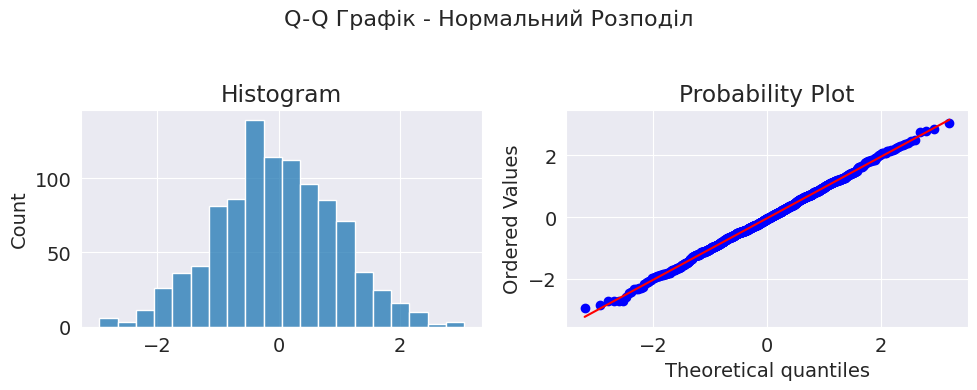

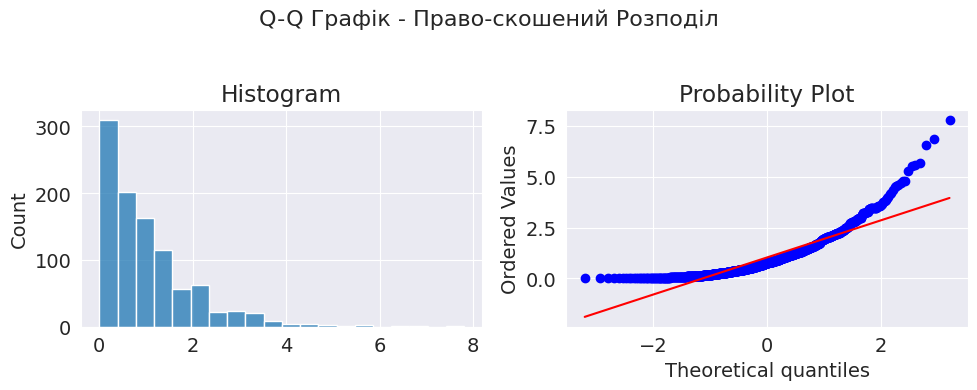

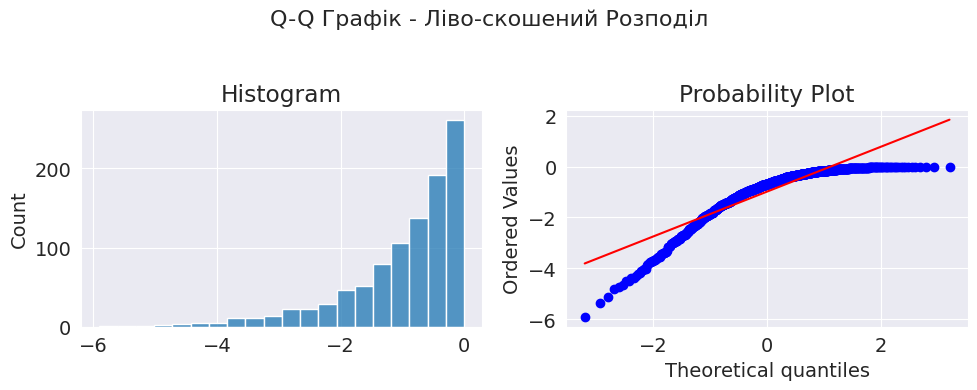

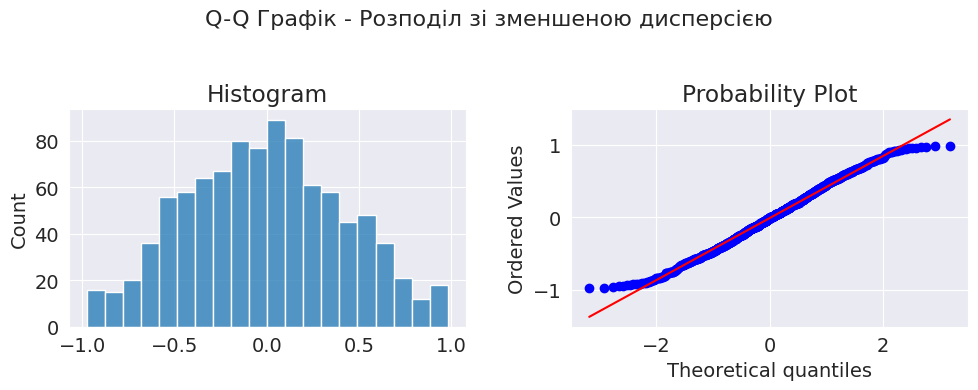

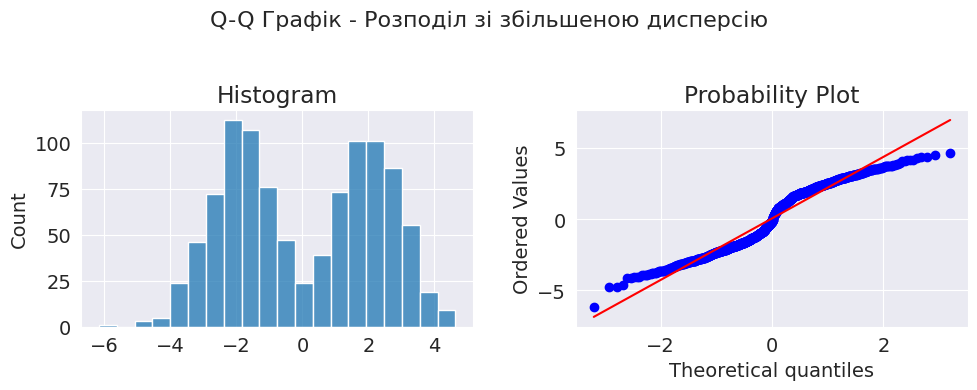

In [ ]:
import seaborn as sns

def create_plot(data, title):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(title, fontsize=16)

    sns.histplot(data, bins=20, ax=axs[0])
    axs[0].set_title('Histogram')

    stats.probplot(data, dist="norm", plot=axs[1])
    axs[1].set_title('Probability Plot')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

create_plot(normal_data, 'Q-Q Графік - Нормальний Розподіл')
create_plot(right_skewed_data, 'Q-Q Графік - Право-скошений Розподіл')
create_plot(left_skewed_data, 'Q-Q Графік - Ліво-скошений Розподіл')
create_plot(under_dispersed_data, 'Q-Q Графік - Розподіл зі зменшеною дисперсією')
create_plot(over_dispersed_data, 'Q-Q Графік - Розподіл зі збільшеною дисперсію')


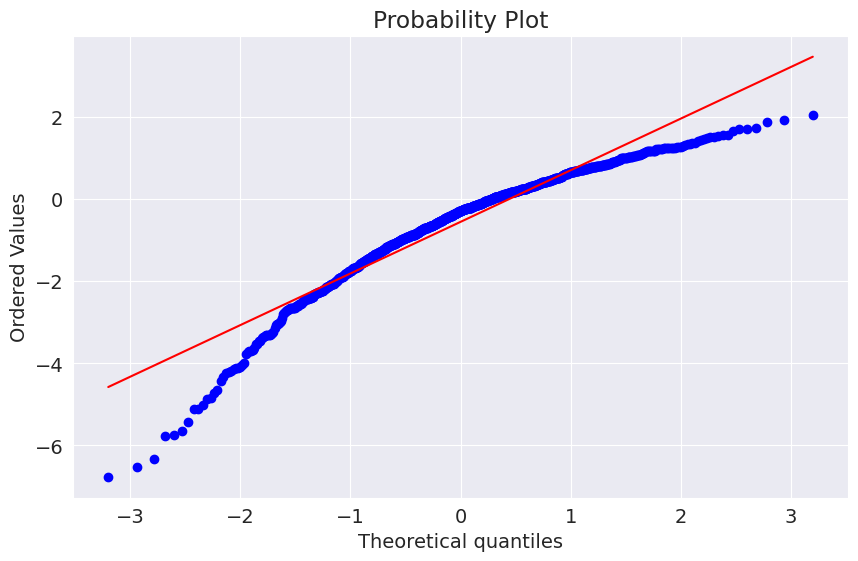

In [ ]:
stats.probplot(np.log(right_skewed_data), dist="norm", plot=plt);

-----------

# Повернемось до нашої задачі.

Індекс маси тіла (ІМТ) — це спосіб оцінки того, чи є маса тіла людини пропорційною до її зросту. Він розраховується за формулою:

$$ \text{ІМТ} = \frac{\text{маса тіла (кг)}}{\text{зріст (м)}^2} $$

Де маса тіла вказується в кілограмах, а зріст — в метрах. Цей показник дозволяє класифікувати вагу особи та оцінити ризики для здоров'я, що можуть виникнути через недостатню чи надмірну масу тіла.

Ось як можна інтерпретувати значення ІМТ:

![](https://i.imgur.com/lh23OiY.jpg)

Зверніть увагу, вік розподілений рівномірно, а ІМТ - схоже що за законом Гауса, але маємо застосувати тести для перевірки. Рівномірний розподіл віку може бути зумовлений спеціальним формуванням вибірки таким чином для дослідження.

А от ІМТ, який є показником тілесної маси людини відносно її зросту, часто формує нормальний розподіл у населення. Це тому, що ІМТ є результатом складних взаємодій між генетичними, метаболічними, екологічними та культурними чинниками, які зазвичай розподілені серед населення у вигляді bell-curve.

**Центральна гранична теорема** стверджує, що сума великої кількості незалежних випадкових змінних, кожна з яких має власний розподіл, зазвичай наближається до нормального розподілу. Оскільки ІМТ визначаєть
ся багатьма такими факторами, він має тенденцію до формування нормального розподілу.

**Коротко про ЦГТ**

**Центральна гранична теорема** — це один з ключових принципів статистики, який допомагає нам розуміти, як розподіляються різні дані чи результати спостережень.

Уявімо, що ви кидаєте звичайну монету багато разів і записуєте результати. Кожен кидок можна розглядати як маленький випадковий експеримент, де випадає або "герб", або "решка". Якщо ви кинете монету лише кілька разів, результати можуть сильно відрізнятися (наприклад, всі "герби" або всі "решки"). Але якщо ви кинете монету тисячі разів, співвідношення "гербів" до "решок" буде більш-менш однаковим.

Центральна гранична теорема каже, що якщо ви візьмете багато маленьких випадкових експериментів і додасте їхні результати, то загальний результат (або їх середнє значення) зазвичай матиме форму, яка нагадує дзвіночок, який ми називаємо нормальним розподілом або гауссовим розподілом. Це вірно навіть тоді, коли окремі результати цих експериментів не розподіляються нормально.

Це особливо корисно, тому що дозволяє нам робити припущення про сукупності даних, знаючи лише кілька простих характеристик, як-от середнє значення і стандартне відхилення, і використовувати це для прогнозування ймовірностей та інших статистичних властивостей.


Чи можете ви пояснити, чому розподіл віків формує рівномірний розподіл, а розподіл ІМТ формує гауссовий розподіл?
>
> BMI це функція двох майже нормальних величин(вага та зрост). В дорослих варіація зросту вузька. Після такого перетворення залишається майже лінійна комбінація ваги та зросту, тому ми бачимо, що наша візуалізація блиска до гаусівского росподілу.


### Збори

Давайте візуалізуємо розподіл "зборів", тобто річних медичних витрат для клієнтів. Це колонка, яку ми намагаємося передбачити. Також використовуймо категоріальну колонку "курець", щоб відрізнити збори для курців та некурців.

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Ми можемо зробити наступні спостереження з вищенаведеного графіку:

* Для більшості клієнтів річні медичні витрати становлять менше \$10,000. Тільки невелика частина клієнтів має вищі медичні витрати, можливо, через нещасні випадки, серйозні хвороби та генетичні захворювання. Розподіл схожий на експоненційний ("power law").
* Існує значна різниця в медичних витратах між курцями та некурцями. Тоді як медіана для некурців становить \$7300, медіана для курців наближається до \$35,000.



## **Завдання 2**:
Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_map=SEX_COLORS,
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)

In [ ]:
fig_hist = px.histogram(
    medical_df,
    x='charges',
    color='sex',
    title='',
    color_discrete_map=SEX_COLORS,
    barmode='overlay'
)

fig_box = px.box(
    medical_df,
    x='sex',
    y='charges',
    color='sex',
    color_discrete_map=SEX_COLORS,
    title=''
)


fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=False,
    vertical_spacing=0.07,
    subplot_titles=['Histogram of charges by sex',
                    'Boxplot of charges by sex']
)


for tr in fig_hist.data:
    fig.add_trace(tr, row=1, col=1)

for tr in fig_box.data:
    fig.add_trace(tr, row=2, col=1)

fig.update_layout(
    height=700,
    title='Charges vs Sex: two plots in one figure'
)

fig.show()


In [ ]:
medical_df.groupby('sex')['charges'].count()

,charges
sex,
female,662
male,676


In [ ]:
medical_df.groupby('sex')['charges'].mean()

,charges
sex,
female,12569.578844
male,13956.751178


Ми можемо зробити висновки з цього графіку:


*   Кількість чоловіків і жінок майже однакова
*   Середні та медіани – вони схожі, але не зовсім однакові
*   У чоловіків спостерігається невелика тенденція до вищих середніх витрат, але різниця значно менша, ніж між курцями та некурцями.
*   Тобто стать має слабкий ефект на витрати порівняно з фактором куріння


In [ ]:
regions = medical_df['region'].unique()

color_map = REGION_COLORS

min_ch = medical_df['charges'].min()
max_ch = medical_df['charges'].max()
nbins = 30
bin_size = (max_ch - min_ch) / nbins

common_xbins = dict(start=min_ch, end=max_ch, size=bin_size)

fig = make_subplots(
    rows=len(regions) + 1,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    row_heights=[0.25] + [0.75/len(regions)] * len(regions),
    subplot_titles=['Boxplot по регіонах'] + list(regions)
)

for reg in regions:
    fig.add_trace(
        go.Box(
            x=medical_df.loc[medical_df['region'] == reg, 'charges'],
            name=reg,
            boxmean=True,
            marker_color=color_map[reg],
            legendgroup=reg,
            showlegend=False
        ),
        row=1, col=1
    )

for i, reg in enumerate(regions, start=2):
    subset = medical_df[medical_df['region'] == reg]
    fig.add_trace(
        go.Histogram(
            x=subset['charges'],
            xbins=common_xbins,
            name=reg,
            marker_color=color_map[reg],
            legendgroup=reg,
            showlegend=True
        ),
        row=i, col=1
    )

for r in range(2, len(regions) + 2):
    fig.update_yaxes(matches='y2', row=r, col=1)

fig.update_layout(
    title='Annual Medical Charges: boxplot + гістограми по регіонах',
    bargap=0.05
)

fig.show()


In [ ]:
medical_df.groupby('region')['charges'].count()

,charges
region,
northeast,324
northwest,325
southeast,364
southwest,325


Ми можемо зробити такі висновки з графіку:

*   Кількість виплат росподілені майже рівномірно за регіонем
*   В дахідній частині mediana схожа, але середнє значення різне. Причина тому це викиди.
*   цікаво подивитись на boxplot без данних які вище за 50К
*   Дорогі кейси є в кожному регіоні

### Курець

Давайте візуалізуємо розподіл колонки "курець" (що містить значення "так" та "ні") за допомогою гістограми.

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker', color_discrete_map=SEX_COLORS)

Виглядає, що лише 20% клієнтів повідомили, що вони курять. Маючи якусь нац статистику щодо куріння ми б могли порівняти це з даними.Чи можете ви перевірити, чи відповідає це національному середньому, припускаючи, що дані були зібрані у 2010 році? Ми також бачимо, що куріння здається більш поширеним звичкам серед чоловіків. Чи можете ви це підтвердити?

Так, це пітвердженно на сайті https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6035a5.htm
 In 2010, an estimated 19.3% (45.3 million) of U.S. adults were current cigarette smokers; of these, 78.2% (35.4 million) smoked every day, and 21.8% (9.9 million) smoked some days. Prevalence was higher among men (21.5%) than women (17.3%)

Також маємо на тим сайті інформацію стосовно регіонів.
За регіонами поширеність була найвищою на Середньому Заході Midwest (21,8%) та Півдні South(21,0%), а найнижчою на Заході the West(15,9%). Та ми бачимо що можливо є взаємо звязок виплат між кількість курців, регіонем.

##**Завдання 3**:
Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
fig_hist_region = px.histogram(
    medical_df,
    x='smoker',
    color='region',
    color_discrete_map=REGION_COLORS,
    title='Region',
    barmode='group'
)

for tr in fig_hist_region.data:
    fig.add_trace(tr, row=1, col=1)

fig_hist_region.show()


З графіка ми можемо зробити такий висновок

*  Що кількість на південному сході дійсно висока, а на сході низка кількість курців, як і в данних з офіційних джерел.

In [ ]:
fig_hist_gender = px.histogram(
    medical_df,
    x='smoker',
    color='sex',
    color_discrete_map=SEX_COLORS,
    title='Gender',
    barmode='group'
)


for tr in fig_hist_gender.data:
    fig.add_trace(tr, row=1, col=1)

fig_hist_gender.show()

З гістограми можемо зробити висновки, що чоловіки курять більше. Також це пітверджують офіційні данні. Різниця між регіонами є помітною в абсолютних числах, але не драматичною в пропорціях.

In [ ]:
fig_hist_children = px.histogram(
    medical_df,
    x='smoker',
    color='children',
    color_discrete_map=CHILDREN_COLORS,
    title='',
    barmode='group'
)

for tr in fig_hist_children.data:
    fig.add_trace(tr, row=1, col=1)

fig_hist_children.show()


І серед курців, і серед некурців переважають люди з 0–2 дітьми – пропорції за кількістю дітей виглядають дуже схожими.
Родини з 4–5 дітьми трапляються дуже рідко в обох групах, тому за ними важко робити якісь тверді висновки. Тому можу припустити, що кількість дітей не впливає на те чи куре людина чи ні.

Після того, як ми розглянули окремі стовпці, тепер можемо візуалізувати взаємозв'язок між "витратами" (значенням, яке ми хочемо прогнозувати) та іншими стовпцями.

### Вік та витрати

Давайте візуалізуємо взаємозв'язок між "віком" та "витратами", використовуючи діаграму розсіювання. Кожна точка на діаграмі розсіювання представляє одного клієнта. Ми також використаємо значення у стовпці "курець" для кольору точок.

In [ ]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='smoker',
    color_discrete_map=SEX_COLORS,
    symbol='sex',
    symbol_map={
        'male': 'x',
        'female': 'circle'
    },
    opacity=0.8,
    hover_data=['sex'],
    title='Age vs Charges'
)

fig.update_traces(marker_size=7)
fig.show()


Ми можемо зробити наступні висновки з вищенаведеної діаграми:

* Загальна тенденція, здається, полягає в тому, що медичні витрати зростають з віком, як ми могли б очікувати. Однак, є значна варіативність на кожному віці, і очевидно, що вік від самого себе не може бути використаний для точного визначення медичних витрат.


* Ми можемо побачити три "кластери" точок, кожен з яких, здається, формує лінію зі зростаючим нахилом:

     1. Перший і найбільший кластер складається, головним чином, з "здорових некурців", які мають відносно низькі медичні витрати порівняно з іншими.
     
     2. Другий кластер містить суміш курців і некурців. Можливо, це насправді два різних, але перекриваються кластери: "некурці з медичними проблемами" та "курці без серйозних медичних проблем".
     
     3. Останній кластер складається виключно з курців, очевидно, курців з серйозними медичними проблемами, які, можливо, пов'язані або погіршені курінням.
     

>Які інші висновки ви можете зробити з вищенаведеної діаграми?
>
>  З діаграми Age vs Charges видно, що в курців бачимо дві чіткі лініі, а в не курців бачимо одну чітку лінію , а потім дані не мають ліній ного зв'язку. Загалом медичні витрати мають тенденцію зростати з віком, проте для кожного віку спостерігається велика розкидка значень, тому вік сам по собі не є достатнім предиктором витрат. Найбільш чітко проявляється фактор куріння: у курців (сині точки) витрати значно вищі, особливо після 40–45 років, тобто з віком вплив куріння на витрати посилюється. Некурці утворюють нижній «пояс» із відносно невеликими витратами, тоді як найвищі витрати майже завжди належать курцям. Роль статі на цьому графіку виражена слабко: чоловіки й жінки розташовані схожим чином, без чітко відокремлених «хмар», тому стать впливає на витрати значно менше, ніж куріння та вік.

### Індекс маси тіла та витрати

Давайте візуалізуємо відношення між ІМТ (індексом маси тіла) та витратами, використовуючи ще один діаграму розсіювання. Ще раз використаємо значення з колонки "курець" для кольору точок.

In [ ]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Здається, що для некурців збільшення ІМТ не здається пов'язаним зі збільшенням медичних витрат. Однак медичні витрати, здається, значно вищі для курців з ІМТ більше 30.

Які інші висновки ви можете зробити з вищенаведеного графіка?

> **ДЗ 5**: Створіть ще декілька графіків для візуалізації зв'язку між стовпцем "charges" та іншими стовпцями ("children", "sex", "region" та "smoker"). Підсумуйте висновки, отримані з цих графіків.
>
> *Підказка*: Використовуйте графіки-скрипки (`px.violin`) та стовпчасті діаграми (`sns.barplot`)

##**Завдання 4**:
Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
px.violin(
    medical_df,
    x='smoker',
    y='charges',
    color='smoker',
    color_discrete_map=SMOKER_COLORS,
    box=True,
    title='Charges distribution by smoking status'
)


На графіку Charges distribution by smoking status видно, що розподіл медичних витрат у курців і некурців суттєво відрізняється. У некурців більшість значень зосереджена в діапазоні приблизно від 3 до 12 тис. доларів, медіана становить близько 7 тис., а «скрипка» вузька й компактна, тобто витрати відносно помірні й менш розкидані. У курців медіана набагато вища — близько 34 тис. доларів, інтерквартильний діапазон значно ширший (орієнтовно 20–45 тис.), а сам розподіл розтягнутий угору до ~64 тис. Це означає, що курці не лише мають значно більші типові витрати, але й частіше потрапляють у дуже дорогі випадки лікування. Таким чином, статус курця є одним із найсильніших факторів, пов’язаних з рівнем медичних витрат у цьому датасеті.

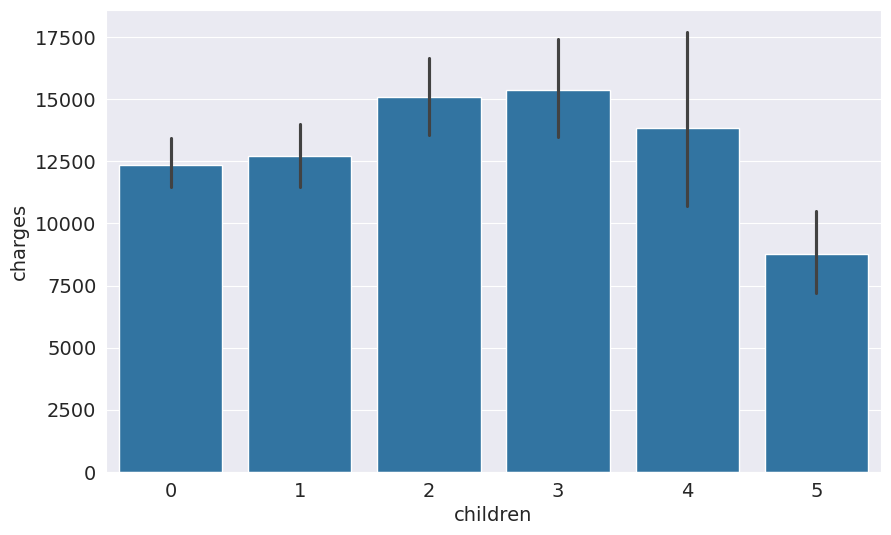

In [ ]:
sns.barplot(medical_df, x='children', y='charges');

In [ ]:
px.violin(
    medical_df,
    x='children',
    y='charges',
    color='children',
    color_discrete_map=CHILDREN_COLORS,
    box=True,
    title='Charges distribution by number of children'
)

Розподіли витрат для різної кількості дітей загалом подібні: у всіх групах є правий хвіст із дорогими випадками. Медіана витрат у сімей з 1–3 дітьми трохи вища, ніж у клієнтів без дітей, однак вплив кількості дітей на витрати відносно невеликий. Можна пояснити це тим, що родина з дитиною хворіє чатише, але стверджувати, що саме це причина ми не можемо. Для 4–5 дітей вибірка мала, тому оцінки менш надійні.

In [ ]:
px.violin(medical_df, x='sex', y='charges', color='sex', color_discrete_map=SEX_COLORS, box=True, title='Charges distribution by gender')

Розподіл медичних витрат для чоловіків і жінок загалом дуже схожий: основна маса значень у обох групах зосереджена приблизно між 4 000 і 14 000 доларів, а медіани близькі за величиною (у чоловіків трохи вища). Водночас у чоловіків спостерігається більший розкид у верхній частині розподілу й більше дуже дорогих випадків лікування. Тобто стать пов’язана з витратами слабко, особливо порівняно з таким фактором, як куріння, але в чоловіків дещо частіше трапляються високі медичні витрати.

In [ ]:
px.violin(medical_df, x='region', y='charges', color='region', color_discrete_map=REGION_COLORS, box=True, title='Charges distribution by region')

Розподіли витрат у всіх чотирьох регіонах дуже подібні: медіани близькі (близько 9–10 тис. доларів), а основна маса виплат зосереджена в діапазоні приблизно 3–15 тис. доларів. У кожному регіоні є довгий правий «хвіст» із поодинокими дуже дорогими випадками лікування; у southeast та northeast таких спостережень дещо більше, тому їх скрипки трохи довші у верхній частині. Загалом регіон має лише слабкий вплив на витрати, особливо в порівнянні з фактором куріння.

### Кореляція

Як ви можете бачити з аналізу, значення в деяких стовпцях більш тісно пов'язані зі значеннями в "charges" порівняно з іншими стовпцями. Наприклад, "age" та "charges" здається ростуть разом, тоді як "bmi" та "charges" - ні.

Цей зв'язок часто виражається числово за допомогою міри, яка називається _коефіцієнтом кореляції_, який можна обчислити за допомогою методу `.corr` серії Pandas.

In [ ]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

Щоб обчислити кореляцію для категоріальних стовпців, їх спочатку потрібно перетворити на числові стовпці.

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

Ось як можна інтерпретувати коефіцієнти кореляції ([джерело](https://statisticsbyjim.com/basics/correlations)):

* **Сила**: Чим більше абсолютне значення коефіцієнта кореляції, тим сильніше відношення.

    * Крайні значення -1 та 1 вказують на ідеально лінійне відношення, коли зміна однієї змінної супроводжується абсолютно стабільною зміною іншої. Для цих відношень усі точки даних розташовані на лінії. На практиці ви не побачите жодного типу ідеального відношення.

    * Коефіцієнт нуля представляє відсутність лінійного відношення. Коли одна змінна збільшується, інша змінна не має тенденції збільшуватися або зменшуватися.
    
    * Коли значення знаходиться між 0 та +1/-1, існує відношення, але точки не всі розташовані на лінії. Як r наближається до -1 або 1, сила відношення збільшується, і точки даних схильні розташовуватися ближче до лінії.


* **Напрямок**: Знак коефіцієнта кореляції представляє напрямок відношення.

    * Позитивні коефіцієнти вказують на те, що коли значення однієї змінної збільшується, значення іншої змінної також має тенденцію збільшуватися. Позитивні відношення створюють підйомний нахил на діаграмі розсіювання.
    
    * Негативні коефіцієнти представляють випадки, коли при збільшенні значення однієї змінної, значення іншої змінної має тенденцію зменшуватися. Негативні відношення створюють спадний нахил.

Ось таке ж відношення, виражене візуально ([джерело](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

Коефіцієнт кореляції має наступну формулу:

<img src="https://i.imgur.com/unapugP.png" width="360">

Ви можете дізнатися більше про математичне визначення та геометричну інтерпретацію кореляції тут: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes також надає метод `.corr` для обчислення коефіцієнтів кореляції між усіма парами числових стовпців.

In [ ]:
medical_df.corr(numeric_only=True).round(3)

,age,bmi,children,charges
age,1.000,0.109,0.042,0.299
bmi,0.109,1.000,0.013,0.198
children,0.042,0.013,1.000,0.068
charges,0.299,0.198,0.068,1.000


In [ ]:
corr = medical_df.select_dtypes(include='number').corr()
corr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Результат `.corr` називається матрицею кореляції і часто візуалізується за допомогою теплової карти.

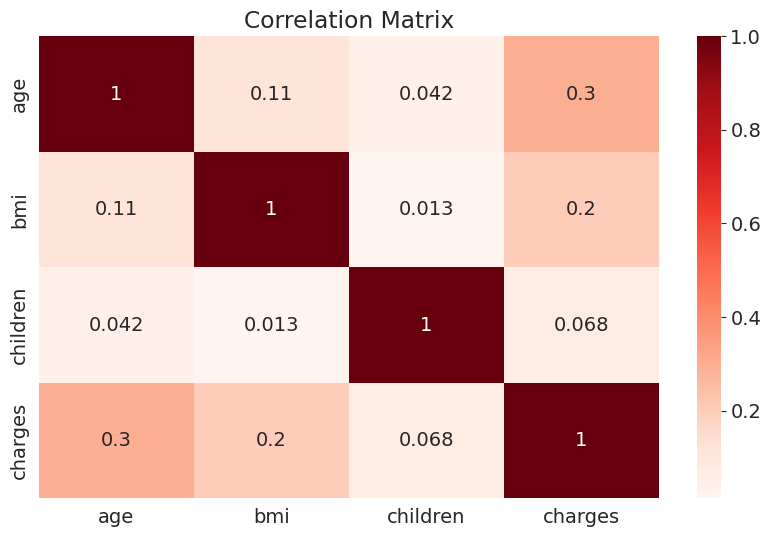

In [ ]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

**Correlation vs Causality:** Зверніть увагу, що висока кореляція не може бути використана для інтерпретації причинно-наслідкового зв'язку між характеристиками. Дві характеристики $X$ та $Y$ можуть бути корельовані, якщо $X$ спричиняє $Y$ або якщо $Y$ спричиняє $X$, або якщо обидва незалежно спричинені якимось іншим фактором $Z$, і кореляція більше не буде вірною, якщо один з причинно-наслідкових зв'язків порушено. Також можливо, що $X$ та $Y$ просто здаються корельованими, тому що вибірка занадто мала.

Хоча це може здатися очевидним, комп'ютери не можуть відрізнити кореляцію від причинності, і рішення, прийняті на основі автоматизованої системи, часто можуть мати великі наслідки для суспільства, тому важливо вивчати, чому автоматизовані системи призводять до певного результату. Визначення причинно-наслідкових зв'язків вимагає людського розуміння.

# Загальний висновок

Дані чисті, адекватні за значеннями й містять сильну праву асиметрію витрат. Найважливіший фактор, пов’язаний із медичними витратами, — куріння, далі за силою впливу йде вік, потім BMI. Стать, регіон і кількість дітей мають значно слабший зв’язок із витратами. Це означає, що при побудові моделі прогнозування charges варто приділити основну увагу статусу курця, віку та ІМТ і пам’ятати, що кореляція не дорівнює причинності.

## Лінійна регресія за допомогою однієї ознаки

### Пригадаємо, що таке "лінія" зі школи

Лінія (або лінійна функія) має наступну формулу:

`y = a*x + b`

У цьому рівнянні, зазвичай, `a` та `b` задані. Це - коефіцієнти.

Почнемо з простого.

`a = 0`
`b = 1`

Отже:

`y = 0*x + 1 = 1`


In [ ]:
import numpy as np

xs = np.linspace(0,20,10)

In [ ]:
xs

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

In [ ]:
a = 0
b = 1
y = xs * a + b

In [ ]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

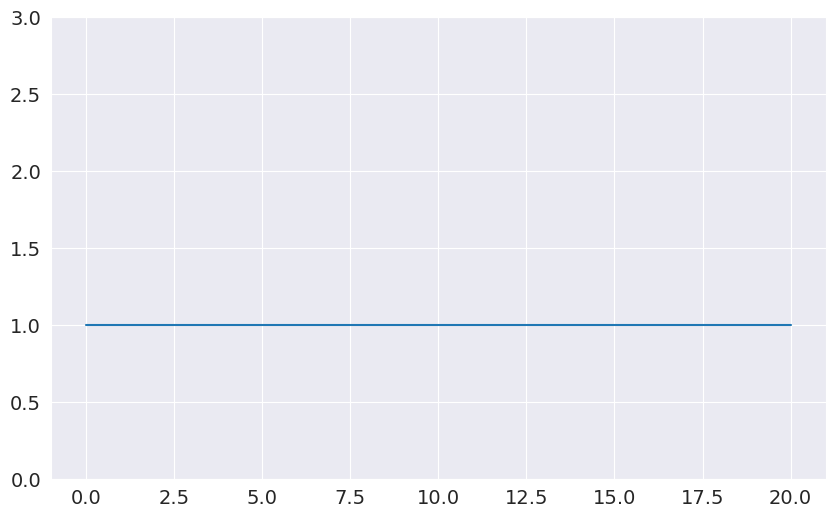

In [ ]:
plt.plot(xs , y, '-')
plt.ylim(ymin=0, ymax=3);

In [ ]:
# винесемо в функцію побудову графіка
def build_linear_dependency(a, b):
    xs = np.linspace(0,20,10)
    y = xs * a + b
    print(xs, y)
    plt.plot(xs , y)
    plt.ylim(ymin=0);

Якщо ж `a = 1 b = 1`

Отже:

`y = 1*x + 1 = x + 1`

[ 0.          2.22222222  4.44444444  6.66666667  8.88888889 11.11111111
 13.33333333 15.55555556 17.77777778 20.        ] [ 1.          3.22222222  5.44444444  7.66666667  9.88888889 12.11111111
 14.33333333 16.55555556 18.77777778 21.        ]


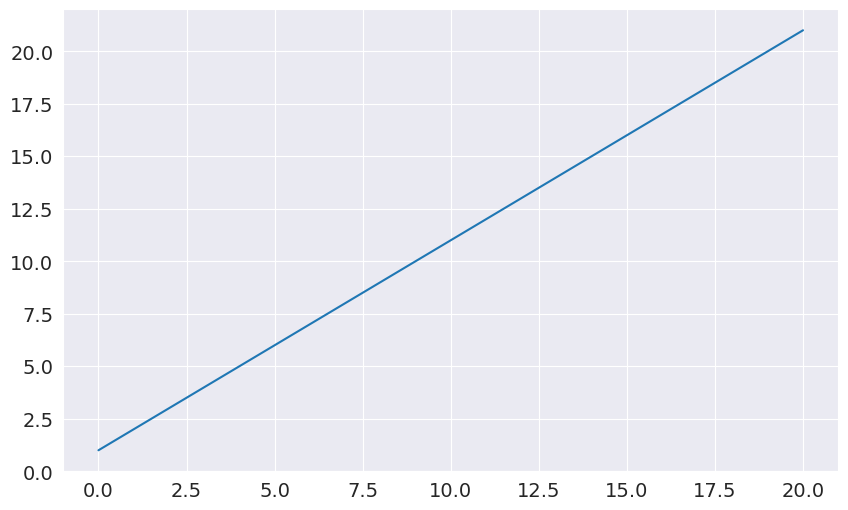

In [ ]:
a = 1
b = 1
build_linear_dependency(a, b)

Якщо ж
`a = 1`
`b = 5`

Отже:

`y = 1*x + 5 = x + 5`

Кут нахилу той самий, але зміщення за віссю ОУ інше.

[ 0.          2.22222222  4.44444444  6.66666667  8.88888889 11.11111111
 13.33333333 15.55555556 17.77777778 20.        ] [ 5.          7.22222222  9.44444444 11.66666667 13.88888889 16.11111111
 18.33333333 20.55555556 22.77777778 25.        ]


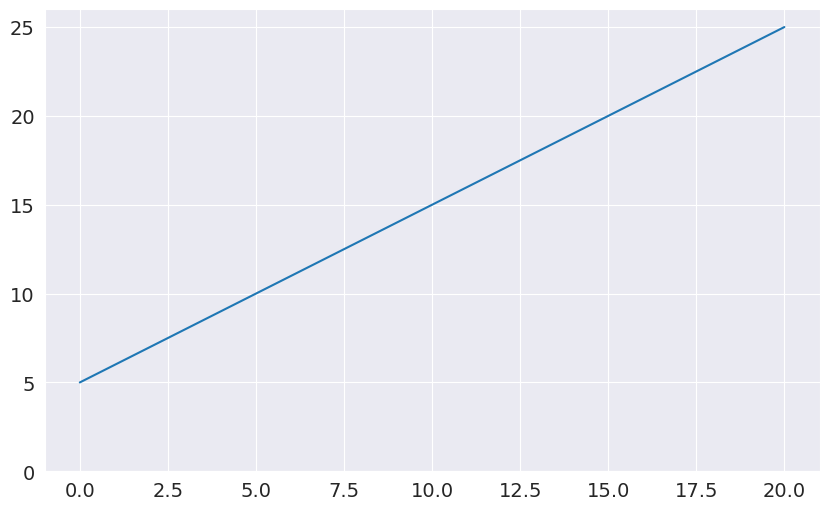

In [ ]:
a = 1
b = 5
build_linear_dependency(a, b);

Якщо ж
`a = 2`
`b = 5`

Отже:

`y = 2*x + 5`

Зміщення за віссю ОУ таке саме, але кут інший.

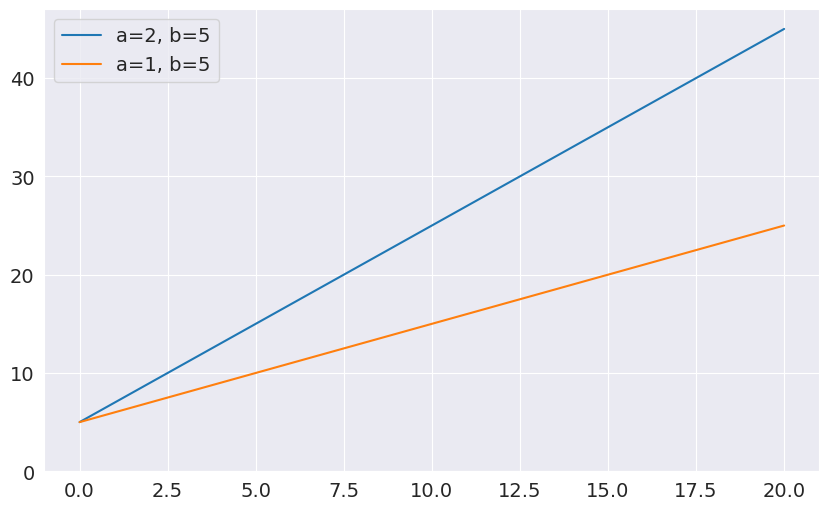

In [ ]:
xs = np.linspace(0,20,10)

a, b = 2, 5
y = xs * a + b
plt.plot(xs , y, '-', label=f'a={a}, b={b}')
a, b = 1, 5
y = xs * a + b
plt.plot(xs , y, '-', label=f'a={a}, b={b}')
plt.ylim(ymin=0)
plt.legend();

Тож, за існуючих значень а і b ми завжди можемо побудувати лінію на площині (де є два виміри).

---------

Вертаємось до нашої задачі.


Ми вже знаємо, що стовпці "курець" та "вік" мають найсильнішу кореляцію з "зборами". Спробуємо знайти спосіб оцінки значення "зборів" за допомогою значення "віку" для некурців. Спочатку створимо фрейм даних, який містить лише дані для некурців.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

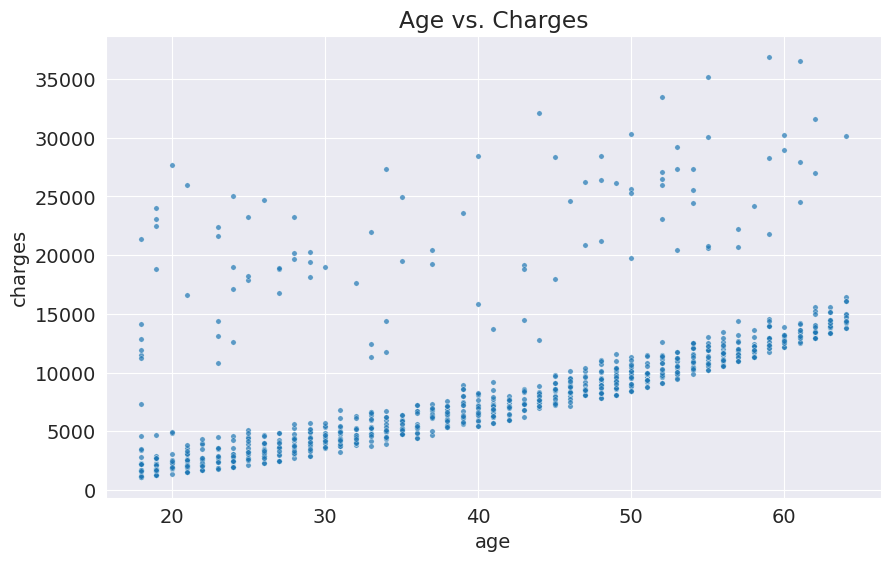

In [ ]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Окрім декількох винятків, точки, здається, формують лінію.

 Ми спробуємо "підібрати" лінію, використовуючи ці точки, і використовувати лінію для прогнозування вартості за віком. Лінія на координатах X&Y має  формулу як ви вже згадали:

  $y = wx + b$

  В машинному навчання тільки "нахил" позначається $w$, а "зміщення" позначається $b$.

### Модель

У вищенаведеному випадку вісь x показує "вік", а вісь y показує "збори". Таким чином, ми припускаємо наступну залежність між ними:

$charges = w \times age + b$

Ми спробуємо визначити $w$ і $b$ для лінії, яка найкраще підходить для даних.

* Цей метод називається _лінійною регресією_, і ми називаємо вищенаведене рівняння _моделлю лінійної регресії_, оскільки воно моделює залежність між "віком" і "вартістю" як пряму лінію.

* Числа $w$ і $b$ називаються _параметрами_ або _вагами_ моделі.

* Значення в стовпці "вік" набору даних називаються _вхідними даними_ моделі, а значення в стовпці "збори" називаються "таргетом" (ціллю).

Давайте визначимо допоміжну функцію `estimate_charges`, щоб обчислити $charges$, з урахуванням $age$, $w$ і $b$.

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

Функція estimate_charges є нашою першою моделлю.

Давайте здогадаємося щодо значень для  𝑤  та  𝑏  і використаємо їх для оцінки вартості послуг.

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

Ми можемо відобразити оцінені збори за допомогою лінійного графіка.

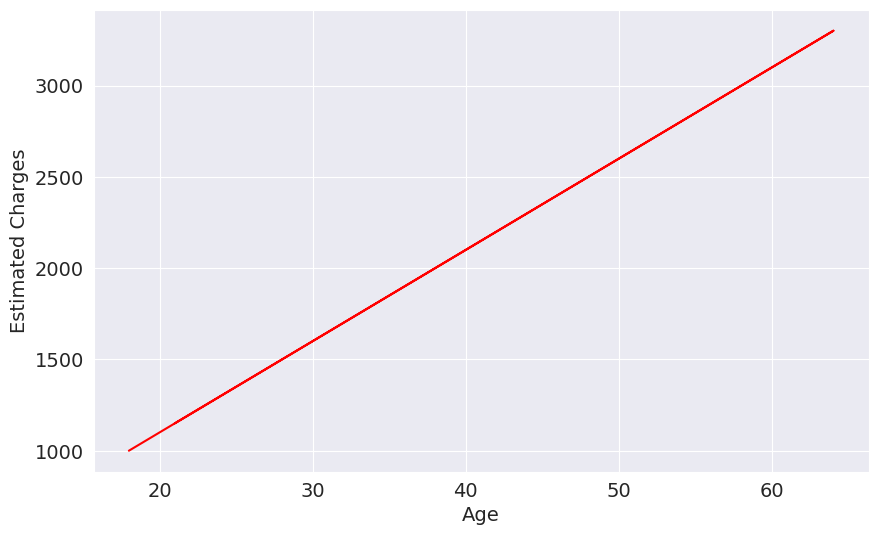

In [ ]:
plt.plot(ages, estimated_charges, 'r');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

Як і очікувалося, точки лежать на прямій лінії.

Ми можемо накласти цю лінію на реальні дані, щоб побачити, наскільки добре наша _модель_ відповідає _даним_.

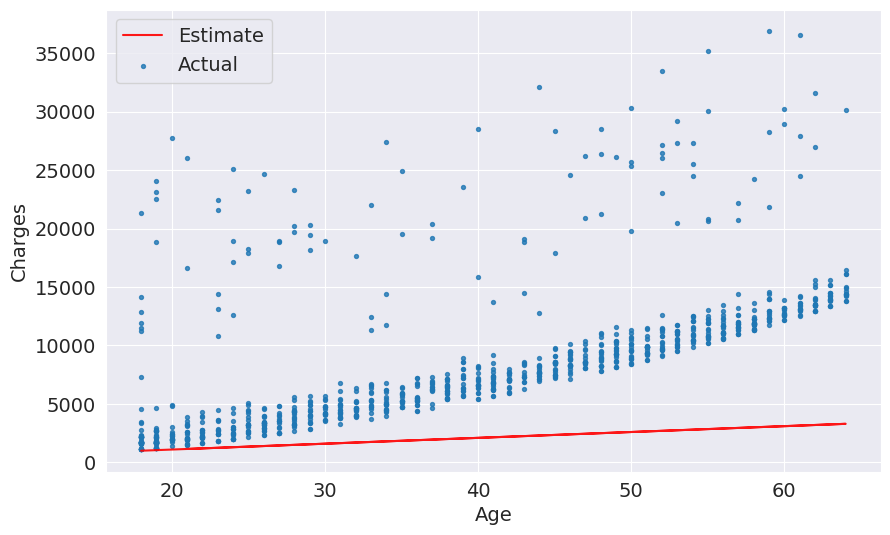

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Очевидно, наші оцінки досить погані, і лінія не "підходить" до даних. Однак, ми можемо спробувати різні значення $w$ та $b$, щоб перемістити лінію. Давайте визначимо допоміжну функцію `try_parameters`, яка приймає `w` та `b` як вхідні дані та створює вищезазначений графік.

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

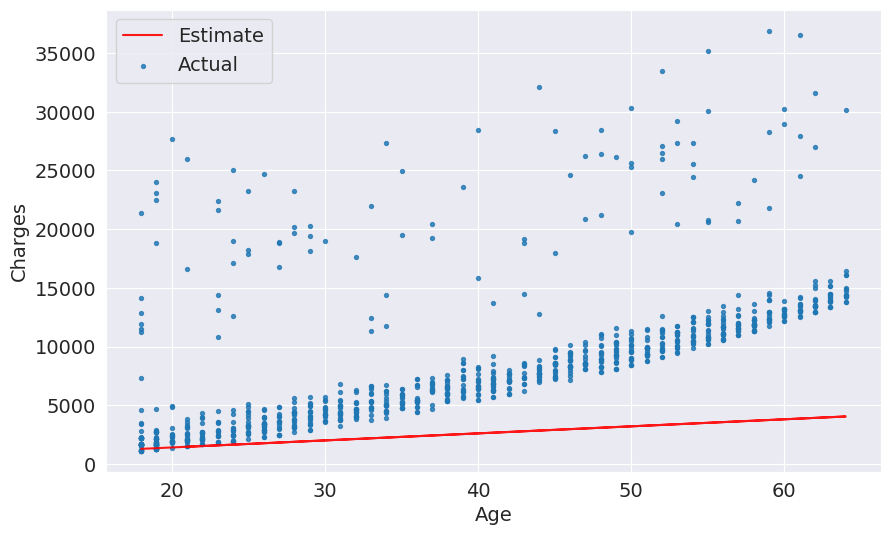

In [ ]:
try_parameters(60,200)

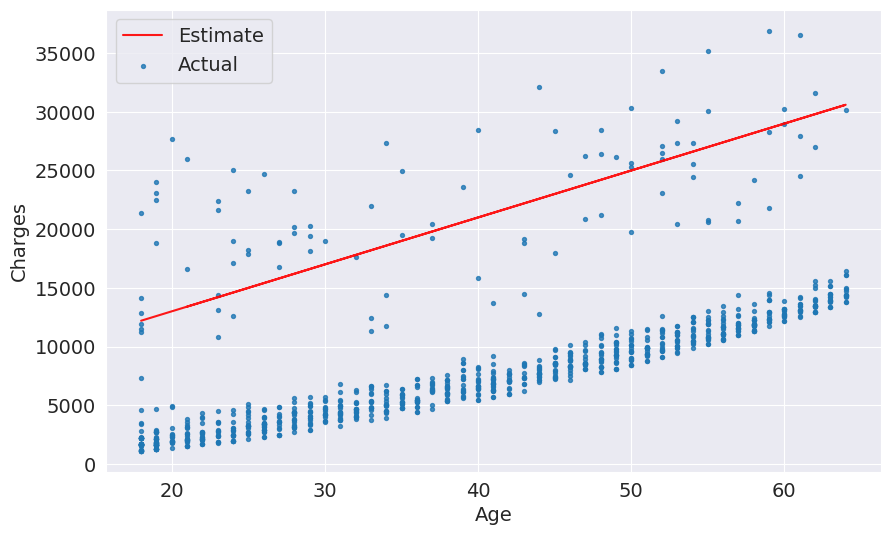

In [ ]:
try_parameters(400,5000)

Коли ми змінюємо значення  𝑤  та  𝑏  вручну, намагаючись візуально наблизити лінію до точок, ми вчимося приблизному відношенню між "віком" та "зборами".

Чи не було б чудово, якби комп'ютер міг спробувати кілька різних значень w та b та вивчити відношення між "віком" та "зборами"? Щоб зробити це, нам потрібно вирішити кілька проблем:

Нам потрібен спосіб числово виміряти, наскільки добре лінія підходить до точок.

Після того, як "міра відповідності" була обчислена, нам потрібен спосіб змінити (оновити) w та b, щоб покращити відповідність (або "підгонку моделі").

Якщо ми зможемо вирішити вищезазначені проблеми, комп'ютер повинен мати змогу визначити w та b для лінії найкращої відповідності, починаючи з випадкового припущення (як ми з вами зробили спочатку).

In [ ]:
charges = non_smoker_df['charges']
x_mean = ages.mean()
y_mean = charges.mean()

w = ((ages - x_mean) * (charges - y_mean)).sum() / ((ages - x_mean) ** 2).sum()
b = y_mean - w * x_mean

print("w =", w)
print("b =", b)

w = 267.2489128311996
b = -2091.4205565650846


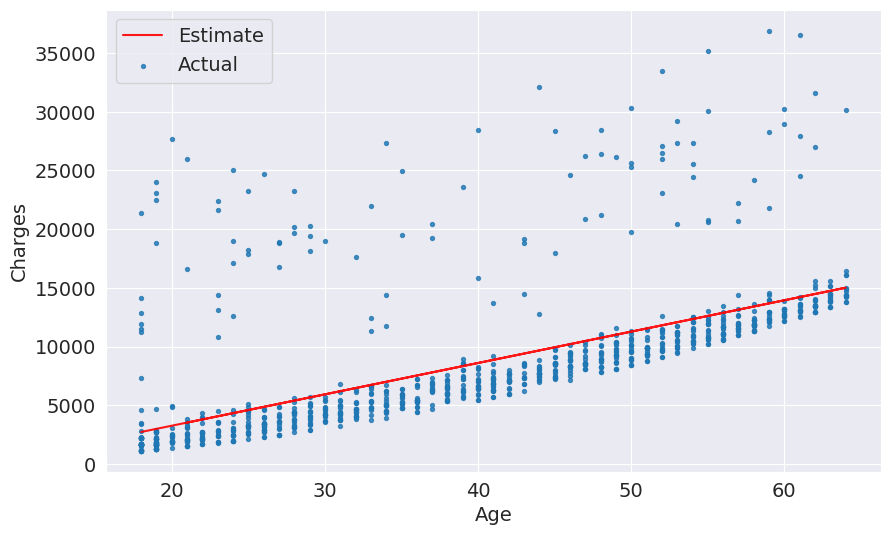

In [ ]:
try_parameters(w,b)

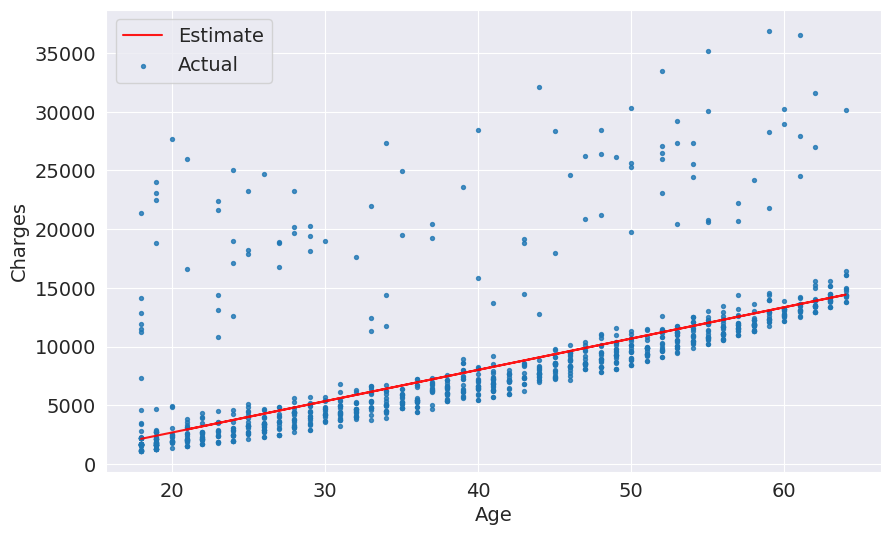

In [ ]:
try_parameters(267, -2670)

### Функція втрат/вартості

Ми можемо порівняти прогнози нашої моделі з фактичними цілями за допомогою наступного методу:

* Розрахувати різницю між цілями та прогнозами (ця різниця називається "залишком")
* Піднести до квадрату всі елементи матриці різниць, щоб усунути від'ємні значення.
* Розрахувати середнє значення елементів у результуючій матриці.
* Взяти квадратний корінь з результату

Результатом є одне число, відоме як **коренева середньоквадратична помилка** (RMSE). Вищенаведений опис можна виразити математично наступним чином:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Геометрично, залишки можна візуалізувати наступним чином:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Давайте визначимо функцію для обчислення RMSE.

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

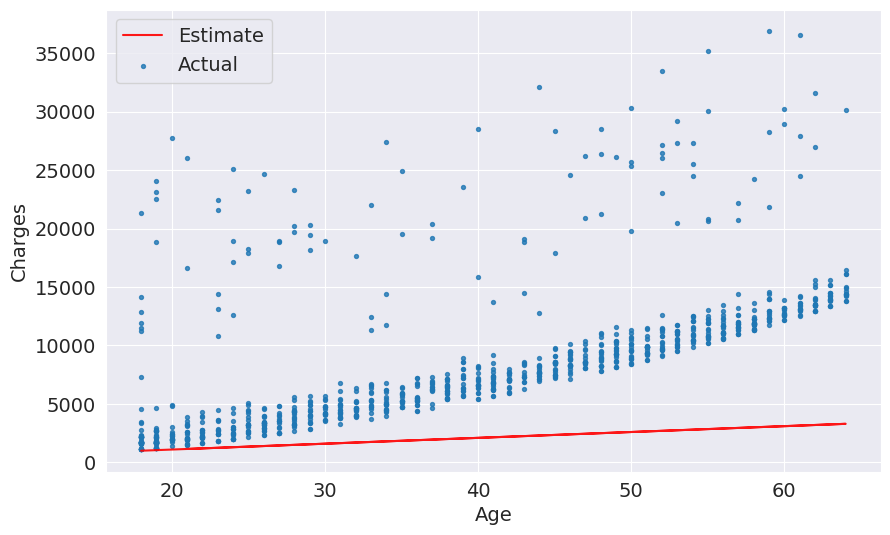

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [ ]:
medical_df.charges.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


Ось як ми можемо **інтерпретувати** вищезазначене число: *В середньому, кожен елемент у прогнозі відрізняється від фактичної цілі на \$8461*.

Результат називається **втратою** (eng. loss), оскільки він вказує на те, наскільки погано модель прогнозує цільові змінні. Він представляє втрату інформації побудованою моделлю: *чим нижче втрата, тим краща модель*.

Давайте змінимо функції `try_parameters`, щоб також відображати втрату.

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


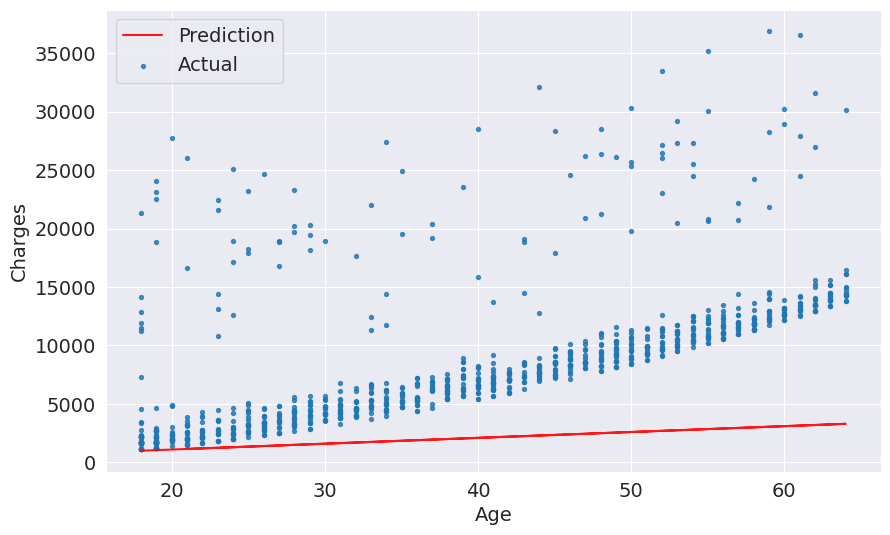

In [ ]:
try_parameters(50, 100)

### Оптимізатор

Далі нам потрібна стратегія зміни ваг `w` та `b` для зменшення втрат і поліпшення "підгонки" лінії до даних. Для цього існує метод найменших квадратів та градієнтний спуск.



* Метод найменших квадратів (краще для менших наборів даних)


* Градієнтний спуск: (краще для більших наборів даних)


Обидва ці методи мають однакову мету: мінімізувати втрати, однак, метод найменших квадратів безпосередньо обчислює найкращі значення для `w` та `b`, використовуючи операції з матрицями, тоді як градієнтний спуск використовує ітеративний підхід, починаючи з випадкових значень `w` та `b` і поступово поліпшуючи їх за допомогою похідних.

Ось візуалізація того, як працює градієнтний спуск:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Чи не схоже це на нашу власну стратегію поступового наближення лінії до точок?

In [ ]:
w = 267
b = -2670


RMSE Loss:  4699.485802535322


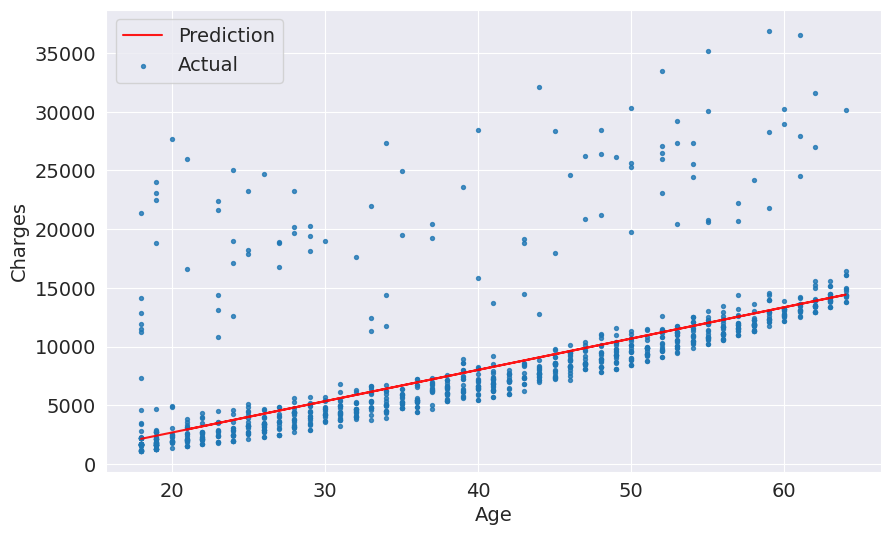

In [ ]:
try_parameters(w,b)

In [ ]:
q1 = np.percentile(target, 25)
q3 = np.percentile(target, 75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

mask = (charges >= lower) & (charges <= upper)

ages_clean = ages[mask]
charges_clean = charges[mask]

x_mean = ages_clean.mean()
y_mean = charges_clean.mean()

w = ((ages_clean - x_mean) * (charges_clean - y_mean)).sum() / ((ages_clean - x_mean) ** 2).sum()
b = y_mean - w * x_mean

print("w =", w)
print("b =", b)

w = 244.715112599943
b = -1982.9469865459077


RMSE Loss:  4737.769771940797


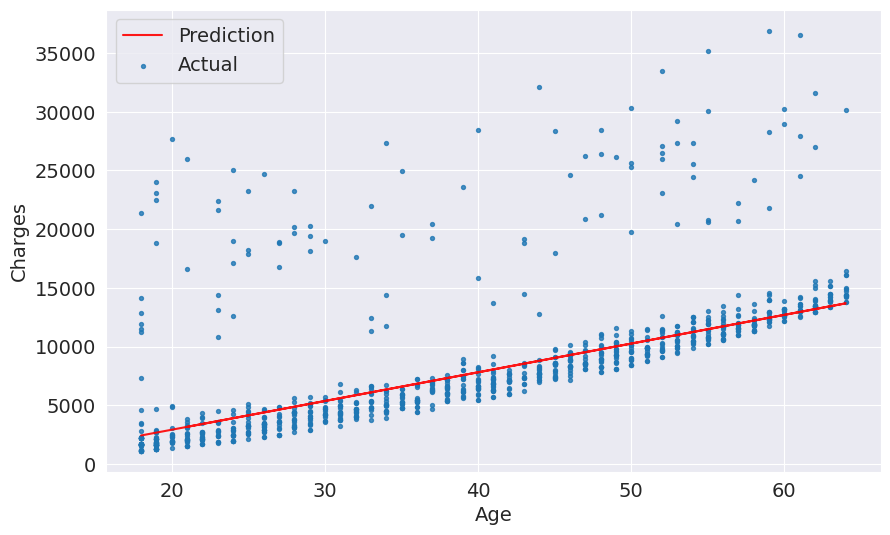

In [ ]:
try_parameters(w, b)

## **Завдання 5.**
Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

In [ ]:
charges = non_smoker_df['charges']
x_mean = ages.mean()
y_mean = charges.mean()

w = ((ages - x_mean) * (charges - y_mean)).sum() / ((ages - x_mean) ** 2).sum()
b = y_mean - w * x_mean

print("w =", w)
print("b =", b)

w = 267.2489128311996
b = -2091.4205565650846


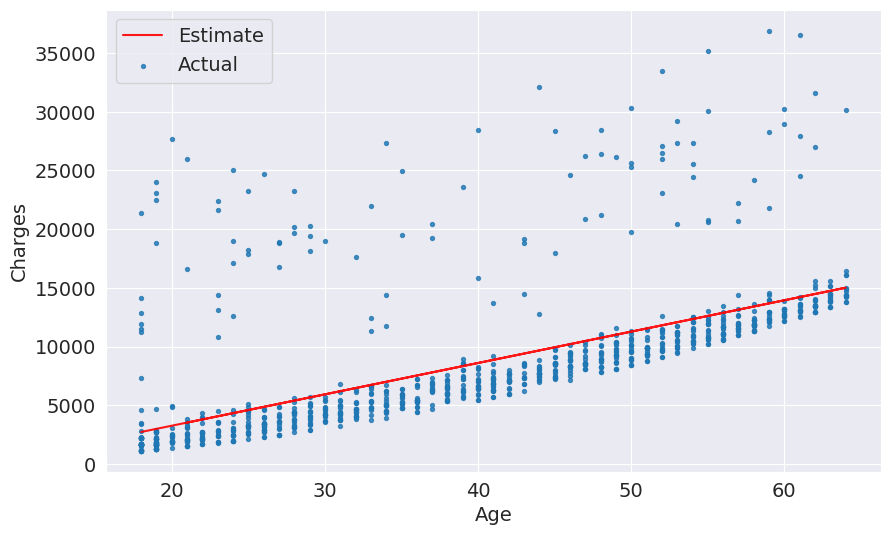

In [ ]:
try_parameters(non_smoker_df, w,b);

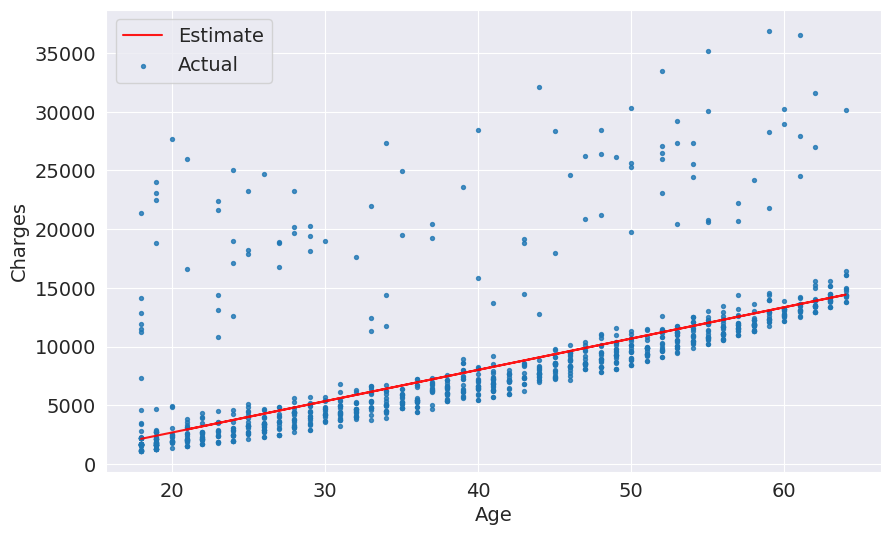

In [ ]:
try_parameters(non_smoker_df, 267, -2670)

In [ ]:
q1 = np.percentile(target, 25)
q3 = np.percentile(target, 75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

mask = (charges >= lower) & (charges <= upper)

ages_clean = ages[mask]
charges_clean = charges[mask]

x_mean = ages_clean.mean()
y_mean = charges_clean.mean()

w = ((ages_clean - x_mean) * (charges_clean - y_mean)).sum() / ((ages_clean - x_mean) ** 2).sum()
b = y_mean - w * x_mean

print("w =", w)
print("b =", b)


w = 244.715112599943
b = -1982.9469865459077


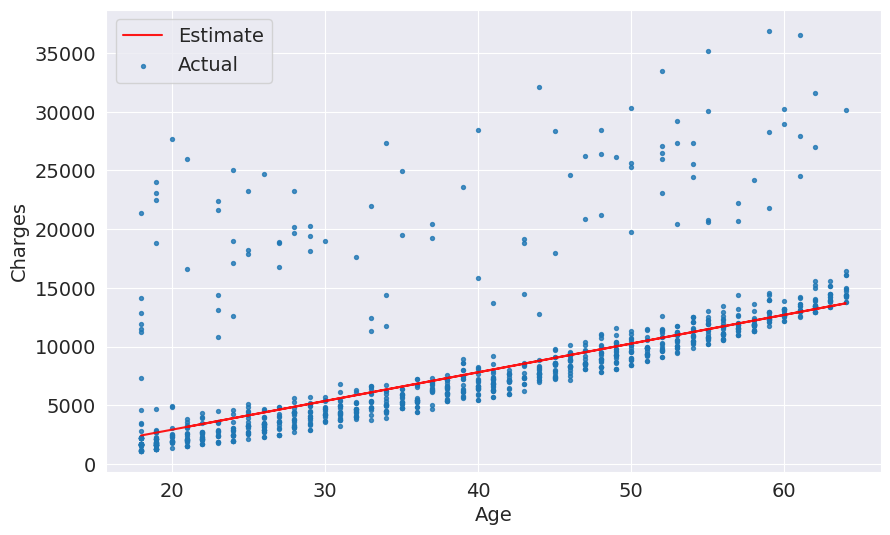

In [ ]:
try_parameters(non_smoker_df, w, b)

Коли я намагалася підібрати дані вручну, результати виходили не надто якісними. Натомість я знайшла більш надійний підхід — обчислювати потрібні значення методом найменших квадратів. Однак точність отриманих моделей ще потрібно перевірити, щоб зрозуміти, наскільки ці результати є коректними.

## **Завдання 6**:
Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
def rmse_for_params(df, w, b):
    y_true = df.charges.to_numpy()
    y_pred = estimate_charges(df.age.to_numpy(), w, b)
    return rmse(y_true, y_pred)

In [ ]:
rmse_for_params(non_smoker_df, w, b)

np.float64(4737.769771940797)

In [ ]:
rmse_for_params(non_smoker_df, 267, -2670)


np.float64(4699.485802535322)

In [ ]:
rmse_for_params(non_smoker_df, 267.2489128311996, -2091.4205565650846)

np.float64(4662.505766636395)

Я очікувала, що застосування методу IQR дозволить отримати кращі результати, ніж розрахунки, виконані із використанням звичайного середнього, однак на практиці модель зі звичайним середнім показала кращу якість. Найкращій результат 4662.505766636395

In [ ]:
# 1) IQR mask (для charges)
target = non_smoker_df["charges"].to_numpy()

q1 = np.percentile(target, 25)
q3 = np.percentile(target, 75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

mask = (target >= lower) & (target <= upper)

# 2) clean dataframe
df_clean = non_smoker_df[mask]

# 3) OLS на clean
x = df_clean["age"].to_numpy()
y = df_clean["charges"].to_numpy()

x_mean, y_mean = x.mean(), y.mean()

w_clean = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()
b_clean = y_mean - w_clean * x_mean

# 4) RMSE на clean
rmse_clean = rmse_for_params(df_clean, w_clean, b_clean)

print("w_clean =", w_clean)
print("b_clean =", b_clean)
print("RMSE_clean =", rmse_clean)
print("Rows clean =", len(df_clean), "out of", len(non_smoker_df))


w_clean = 244.715112599943
b_clean = -1982.9469865459077
RMSE_clean = 2876.2425449980315
Rows clean = 1018 out of 1064


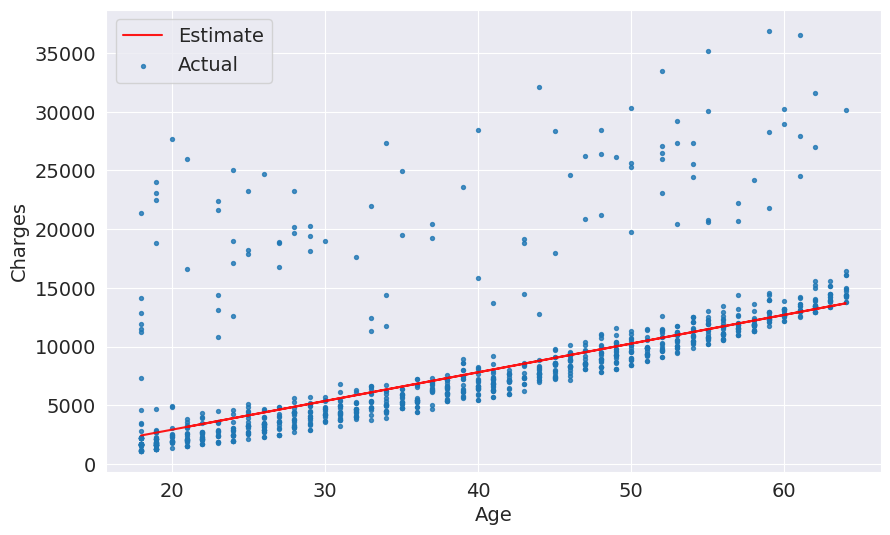

In [ ]:
try_parameters(non_smoker_df, w_clean, b_clean)

**Висновок**

Я реалізувала функцію для обчислення RMSE та порівняла якість моделі.
Для повного датасету non_smoker_df (із викидами) найкращі параметри, знайдені методом найменших квадратів, становлять
w = 267,b = −2091, і вони дали найменший RMSE серед перевірених варіантів (4662.51). Після видалення викидів за правилом IQR (отримали df_clean) оптимальні параметри змінились на
w = 244, b=−1982, а RMSE на очищених даних суттєво зменшився (2876.24). Отже, метод найменших квадратів працює найкраще для підбору
w і b, а розрахунок на даних без outliers є доцільнішим, бо дає кращу якість для більшості типових спостережень.